# Практическая работа 2 - Предварительная обработка данных

## Подготовка

Начнем с импорта нужных нам библиотек.

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder



Далее прочитаем данные таблицы из файла.

In [67]:
selected_cols = ['cat4_income', 'cat15_programmingLanguage', 'num1_14', 'num2_14', 'num3_14']

data_xlsx = pd.read_excel('first_practice_dataframe.xlsx')
# выбираем столбцы, соответствующие варианту
data = data_xlsx[selected_cols]
data

,cat4_income,cat15_programmingLanguage,num1_14,num2_14,num3_14
0,"$40,001 - $50,000",C++,374.391039,514.084829,629.394482
1,"$40,001 - $50,000",C++,511.314903,-1284.279453,655.847157
2,"$40,001 - $50,000",C++,387.409840,0.054361,502.453415
3,"Below $30,001",C++,519.726689,-363.160609,503.461874
4,-,C++,182.642458,466.689296,277.112761
...,...,...,...,...,...
995,"$30,001 - $40,000",js,690.173775,2767.212721,343.463019
996,"Below $30,001",C++,372.988592,NaN,700.745966
997,"$30,001 - $40,000",Java,367.977264,-1121.776117,760.54359
998,"Below $30,001",c,317.274399,-327.990655,433.09489


## 1. Визуальный анализ данных

Выполним первое задание и построим визуальное представление каждого признака

### Столбчатая и круговая диаграммы для качественных признаков

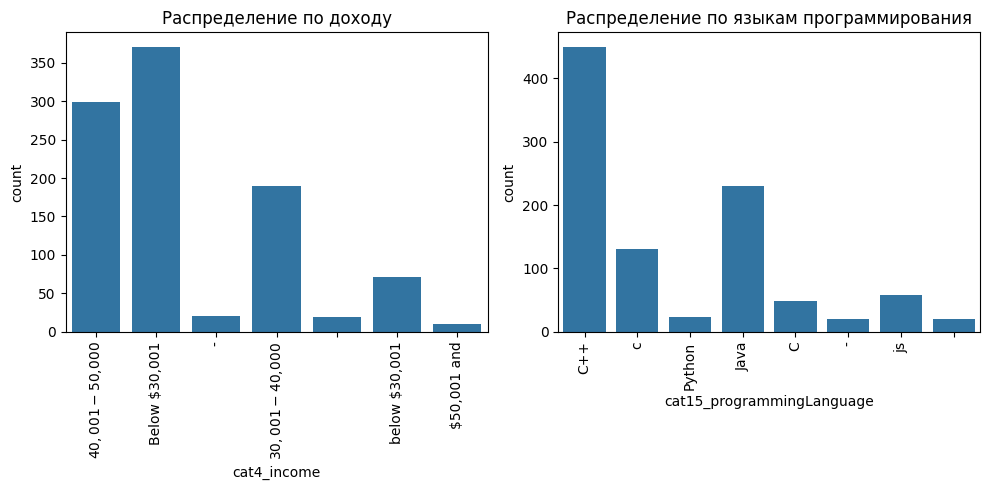

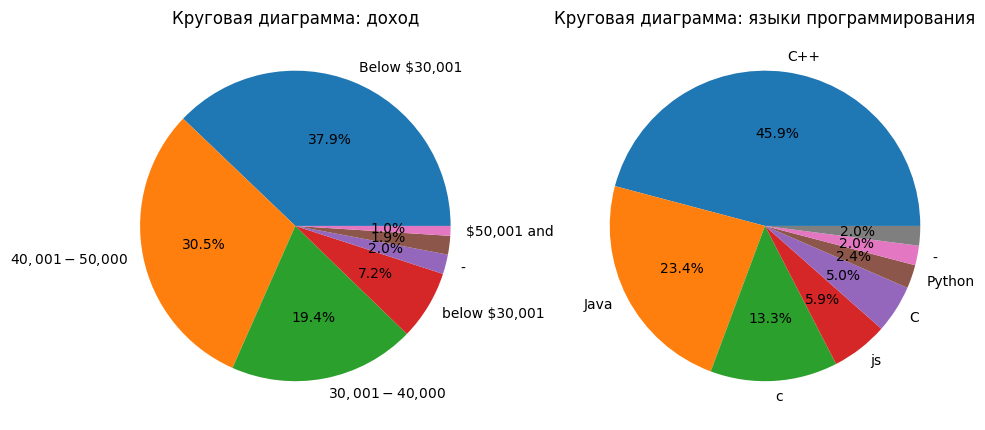

In [68]:
# ['cat4_income', 'cat15_programmingLanguage', 'num1_14', 'num2_14', 'num3_14']

# Гистограммы
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='cat4_income', data=data)
plt.title('Распределение по доходу')
plt.xticks(rotation=90) # Поворот x-меток на 90 градусов

plt.subplot(1, 2, 2)
sns.countplot(x='cat15_programmingLanguage', data=data)
plt.title('Распределение по языкам программирования')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Круговые диаграммы
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['cat4_income'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title('Круговая диаграмма: доход')

plt.subplot(1, 2, 2)
data['cat15_programmingLanguage'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title('Круговая диаграмма: языки программирования')
plt.tight_layout()
plt.show()

### Гистограмма, оценка плотности распределения и диаграмма «ящик с усами» для количественных переменных

C:\Users\alexl\AppData\Local\Temp\ipykernel_9924\2034569836.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy[column] = data_copy[column].replace([r'^\s+$', r'-'], np.nan, regex=True)


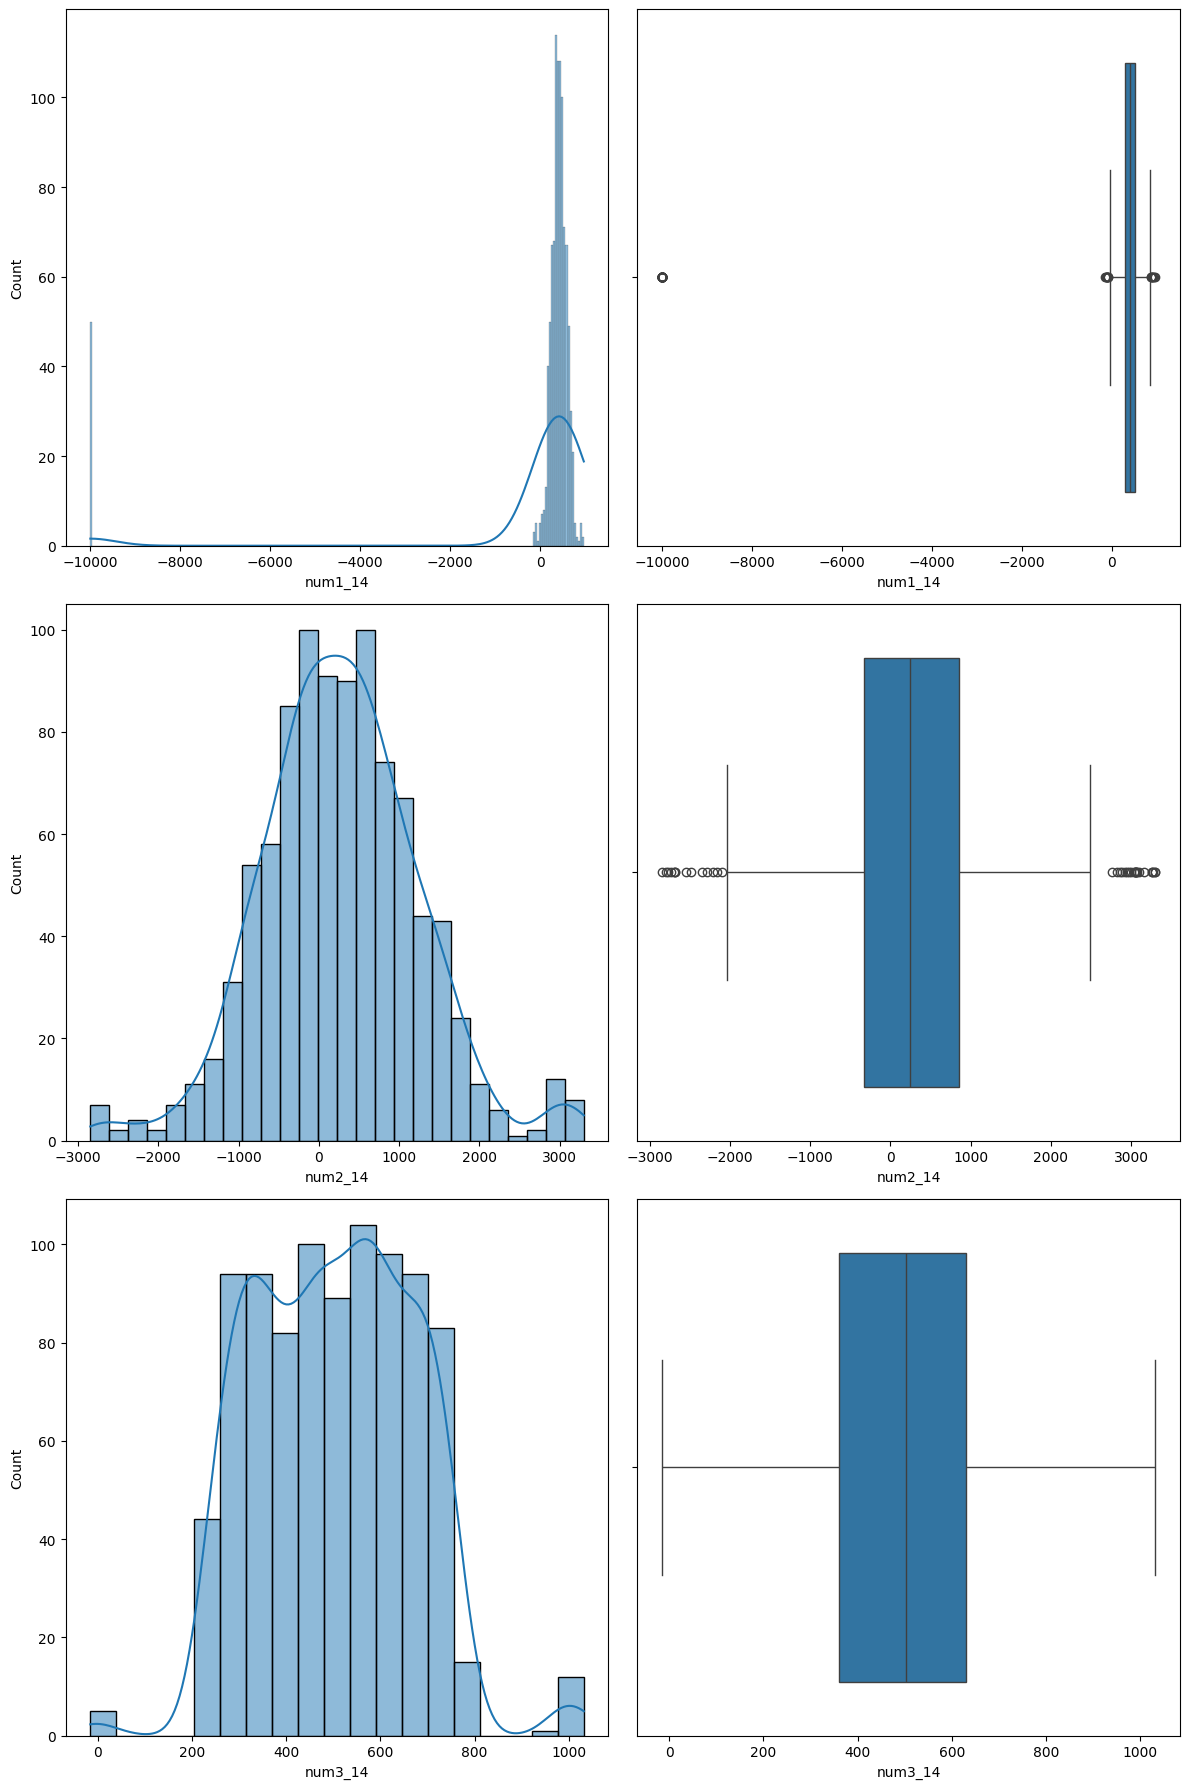

In [69]:
# ['cat4_income', 'cat15_programmingLanguage', 'num1_14', 'num2_14', 'num3_14']

data_copy = data.copy(deep=True)

columns = ['num1_14', 'num2_14', 'num3_14']
for column in columns:
    data_copy[column] = data_copy[column].replace([r'^\s+$', r'-'], np.nan, regex=True) 

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
axes_iterator = iter(axes.flatten())
 
for column in columns:
    sns.histplot(data=data_copy, x=column, kde=True, ax=next(axes_iterator))
    sns.boxplot(x=data_copy[column], ax=next(axes_iterator))

plt.tight_layout()
plt.show()

## 2. Проверка правдоподобности исходных данных

Теперь проведем проверку правдоподобности исходных данных. Приведём не корректные значения к нужному формату.

In [70]:
# ['cat4_income', 'cat15_programmingLanguage', 'num1_14', 'num2_14', 'num3_14']

data = data.copy(deep=True)
data['cat4_income'] = data['cat4_income'].str.upper()
data['cat15_programmingLanguage'] = data['cat15_programmingLanguage'].str.upper()
# Замена некорректных значений в столбцах 'cat4_income' и 'cat15_programmingLanguage' на NaN
for col in ['cat4_income', 'cat15_programmingLanguage']:
    # Замена "", " ", "-" на np.nan
    data[col] = data[col].replace(r'^\s*-?\s*$', np.nan, regex=True)

# Замена значений -9999 на NaN в столбцах 'num1_14', 'num2_14', 'num3_14'
# data_copy[['num1_14', 'num2_14', 'num3_14']] = data_copy[['num1_14', 'num2_14', 'num3_14']].replace(-9999, np.nan)

# Замена пустых строк и символов '-' на NaN в столбцах 'num1_14', 'num2_14', 'num3_14'
for col in ['num1_14', 'num2_14', 'num3_14']:
    data[col] = data[col].replace(r'^\s*-?\s*$', np.nan, regex=True)

data

C:\Users\alexl\AppData\Local\Temp\ipykernel_9924\3305027979.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace(r'^\s*-?\s*$', np.nan, regex=True)


,cat4_income,cat15_programmingLanguage,num1_14,num2_14,num3_14
0,"$40,001 - $50,000",C++,374.391039,514.084829,629.394482
1,"$40,001 - $50,000",C++,511.314903,-1284.279453,655.847157
2,"$40,001 - $50,000",C++,387.409840,0.054361,502.453415
3,"BELOW $30,001",C++,519.726689,-363.160609,503.461874
4,NaN,C++,182.642458,466.689296,277.112761
...,...,...,...,...,...
995,"$30,001 - $40,000",JS,690.173775,2767.212721,343.463019
996,"BELOW $30,001",C++,372.988592,NaN,700.745966
997,"$30,001 - $40,000",JAVA,367.977264,-1121.776117,760.543590
998,"BELOW $30,001",C,317.274399,-327.990655,433.094890


## 3. Поиск аномальных значений

In [71]:
# ['cat4_income', 'cat15_programmingLanguage', 'num1_14', 'num2_14', 'num3_14']

# Определяем порог для сигм
threshold = 3

# Применяем метод сигм и удаляем из data аномальные значения
c, low, upp = sc.stats.sigmaclip(data['num1_14'].dropna(), threshold, threshold)

data_cleaned_sigma = data[(data['num1_14'] >= low) & (data['num1_14'] <= upp)]
data_bad_values = data[(data['num1_14'] <= low) | (data['num1_14'] >= upp)]

# Метод квартилей
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR
    upper_bound = Q3 + IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

data_cleaned_iqr = remove_outliers_iqr(data, 'num1_14')


print('sigma\n', data_cleaned_sigma)
print('IQR\n', data_cleaned_iqr)

sigma
             cat4_income cat15_programmingLanguage     num1_14      num2_14  \
0     $40,001 - $50,000                       C++  374.391039   514.084829   
1     $40,001 - $50,000                       C++  511.314903 -1284.279453   
2     $40,001 - $50,000                       C++  387.409840     0.054361   
3         BELOW $30,001                       C++  519.726689  -363.160609   
4                   NaN                       C++  182.642458   466.689296   
..                  ...                       ...         ...          ...   
995  $30,001 - $40,000                         JS  690.173775  2767.212721   
996       BELOW $30,001                       C++  372.988592          NaN   
997  $30,001 - $40,000                       JAVA  367.977264 -1121.776117   
998       BELOW $30,001                         C  317.274399  -327.990655   
999       BELOW $30,001                    PYTHON  459.393733  1677.148511   

        num3_14  
0    629.394482  
1    655.847157  
2 

## 4. Поиск и восстановление пропущенных значений

In [72]:
# ['cat4_income', 'cat15_programmingLanguage', 'num1_14', 'num2_14', 'num3_14']

# Ренидексируем строчки
data_cleaned_sigma.reset_index(drop=True, inplace=True)

data = data_cleaned_sigma

# Поиск пропущенных значений
missing_data = data.isnull().sum()
print("Статистика по пропущенным значениям\n", missing_data)
ohe = OneHotEncoder(drop='first', sparse_output=False)
 
encoded_data = pd.DataFrame(ohe.fit_transform(data[['cat4_income']]))
encoded_data.columns = ohe.get_feature_names_out()
 
data_onehot = data.join(encoded_data)
data_onehot.drop('cat4_income', axis = 1, inplace = True)
encoded_values = encoded_data.to_numpy()
data_onehot['cat4_income'] = list(map(lambda x: np.argmax(x), encoded_values))
data_onehot.drop(encoded_data.columns, axis=1, inplace=True)

# print(data_onehot)
data = data_onehot

# Восстановление пропущенных значений
# K ближайших соседей для первого признака
imputer = KNNImputer(n_neighbors=5)
features = ['cat4_income', 'num1_14']
data['cat4_income'] = imputer.fit_transform(data[features])

# Замена пропущенных значений самым популярным значением для второго признака
data['cat15_programmingLanguage'] = data['cat15_programmingLanguage'].fillna(data['cat15_programmingLanguage'].mode()[0])

# Замена пропущенных значений средним значением для третьего признака
data['num1_14'] = data['num1_14'].fillna(data['num1_14'].mean())

# Замена пропущенных значений медианой для четвертого признака
data['num2_14'] = data['num2_14'].fillna(data['num2_14'].median())

# K ближайших соседей для пятого признака
data['num3_14'] = imputer.fit_transform(data[['num3_14']])

data


Статистика по пропущенным значениям
 cat4_income                  53
cat15_programmingLanguage    53
num1_14                       0
num2_14                      47
num3_14                      81
dtype: int64


,cat15_programmingLanguage,num1_14,num2_14,num3_14,cat4_income
0,C++,374.391039,514.084829,629.394482,0.0
1,C++,511.314903,-1284.279453,655.847157,0.0
2,C++,387.409840,0.054361,502.453415,0.0
3,C++,519.726689,-363.160609,503.461874,2.0
4,C++,182.642458,466.689296,277.112761,3.0
...,...,...,...,...,...
932,JS,690.173775,2767.212721,343.463019,0.0
933,C++,372.988592,233.623983,700.745966,2.0
934,JAVA,367.977264,-1121.776117,760.543590,0.0
935,C,317.274399,-327.990655,433.094890,2.0


## 5. Преобразование данных

In [73]:
# ['cat4_income', 'cat15_programmingLanguage', 'num1_14', 'num2_14', 'num3_14']

# Стандартизация и нормализация числовых признаков
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
label_encoder = LabelEncoder()
data[['num1_14', 'num2_14', 'num3_14']] = scaler.fit_transform(data[['num1_14', 'num2_14', 'num3_14']])
data[['num1_14', 'num2_14', 'num3_14']] = minmax_scaler.fit_transform(data[['num1_14', 'num2_14', 'num3_14']])

# One-hot encoding для категориального признака cat4_income
# cat4_encoded = ohe.fit_transform(data[['cat4_income']]).toarray()

# Label encoding для категориального признака cat15_programmingLanguage
data['cat15_programmingLanguage'] = label_encoder.fit_transform(data['cat15_programmingLanguage'])

data

,cat15_programmingLanguage,num1_14,num2_14,num3_14,cat4_income
0,1,0.446272,0.546555,0.615748,0.0
1,1,0.594710,0.254109,0.641014,0.0
2,1,0.460385,0.462965,0.494497,0.0
3,1,0.603829,0.403899,0.495460,2.0
4,1,0.238399,0.538848,0.279258,3.0
...,...,...,...,...,...
932,3,0.788609,0.912954,0.342634,0.0
933,1,0.444751,0.500947,0.683901,2.0
934,2,0.439319,0.280535,0.741018,0.0
935,0,0.384352,0.409619,0.428248,2.0


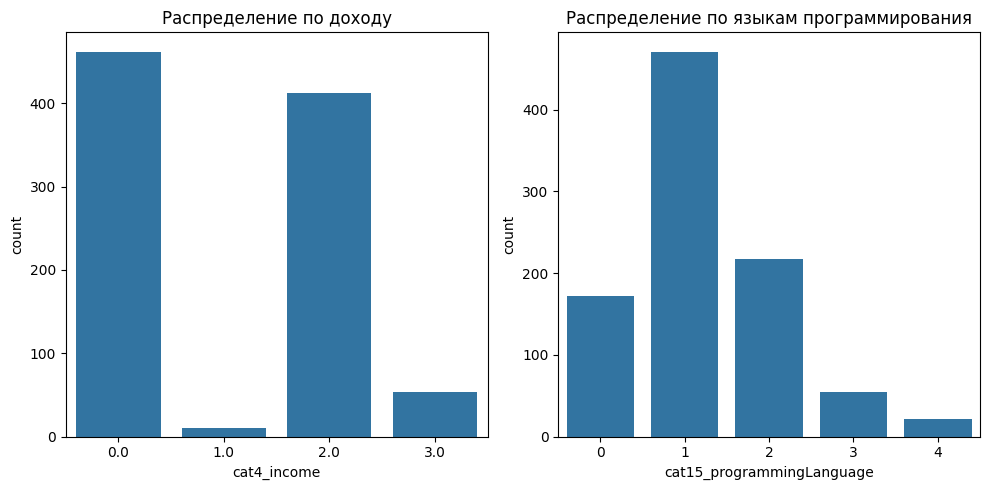

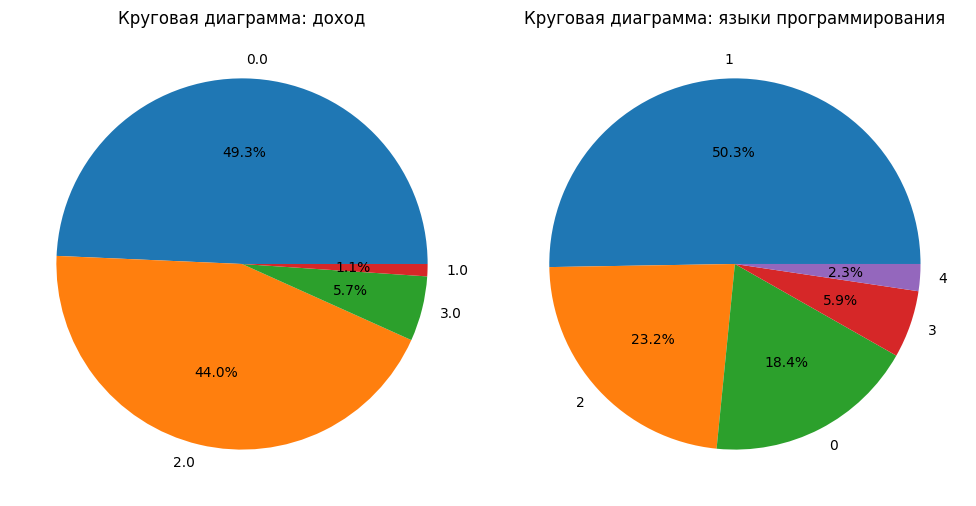

In [74]:
# ['cat4_income', 'cat15_programmingLanguage', 'num1_14', 'num2_14', 'num3_14']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='cat4_income', data=data)
plt.title('Распределение по доходу')
plt.subplot(1, 2, 2)
sns.countplot(x='cat15_programmingLanguage', data=data)
plt.title('Распределение по языкам программирования')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['cat4_income'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title('Круговая диаграмма: доход')
plt.subplot(1, 2, 2)
data['cat15_programmingLanguage'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title('Круговая диаграмма: языки программирования')

plt.tight_layout()
plt.show()